# Prejeto Final



### Dataset - World Happyness Report

###### O Dataset World Happyness Report é um pesquisa anual sobre o estado da felicidade global, que veem ganhando relevância a medida que governos, organizações e sociedade civil o usam para informar suas decisões de formulação de políticas. Medidas de bem-estar podem ser usadas com eficácia para avaliar o progresso das nações, o relatório revisa o estado de felicidade do mundo atual e mostra como a nova ciência da felicidade explica a variação pessoal e nacional de felicidade.

###### A pontuação é baseada em respostas à principal questão de avaliação da vida, essa pergunta, conhecida como escada Cantril, os entrevistados pensam em uma escada com a melhor vida possível para eles com a nota 10 e para a pior vida possível com a nota 0, e assim classificam suas vidas atuais nessa escala. Os fatores analisados são PIB per capita, Suporte Social, Expectativa de vida saudável, Liberdade para fazer escolhas, Genorisidade, Percepção da corrupção e Bem-estar subjetivo. Após a mensuração de cada váriavel é obtida a média ponderada por porpulação. Cada país é comparado a um país hipotético chamado Distopia, a Distopia representa as menores médias de cada variável e juntamente com erros residuais é usado como ponto de referencia de regressão.

###### O resultado final esperado após a analise é identificar quais variáveis tem mais correlação e quais mais impactam para uma classificação positiva.

###### Fonte de dado: https://www.kaggle.com/datasets/unsdsn/world-happiness

### Descrição dos dados - World Happiness Report

**Overall rank (int):**

* Indica a classificação do país.

* Valores possíveis: Números Inteiros não negativos.

* Tipo de variável: Númerica discreta.

**Country or region (object):**

* Indica o nome do país.

* Valores possíveis: Nomes de países.

* Tipo de variável: Categórica nominal.

**Score (float):**

* Indica a pontuação média de cada país.

* Valores possíveis: qualquer valor positivo.

* Tipo de variável: Numérica contínua.

**GDP per capita (float):**

* Indica a contribuição do PIB para a felicidade

* Valores possíveis: qualquer valor positivo.

* Tipo de variável: Numérica contínua.

**Social support (float):**

* Mede o nível de suporte social percebido em cada país.

* Valores possíveis: qualquer valor positivo.

* Tipo de variável: Numérica contínua.

**Healthy life expectancy (float):**

* Mede o nível expectativa de vida saudavél de cada país.

* Valores possíveis: qualquer valor positivo.

* Tipo de variável: Numérica contínua.

**Freedom to make life choices (float):**

* Mede o grau de liberdade percebida para tomar decisões importantes na vida.

* Valores possíveis: qualquer valor positivo.

* Tipo de variável: Numérica contínua.

**Generosity (float):**

* Mede o nivel de generosidade no país.

* Valores possíveis: qualquer valor positivo.

* Tipo de variável: Numérica contínua.

**Perceptions of corruption (object):**

* Mede o nivel de percepção de corrupção no governo ou empresas.

* Valores possíveis: qualquer valor positivo.

* Tipo de variável: Numérica contínua.

In [1]:
%pip install scikit-learn
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


variaveis = [
    'GDP per capita', 
    'Social support', 
    'Healthy life expectancy', 
    'Freedom to make life choices', 
    'Generosity', 
    'Perceptions of corruption'
]


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\araga\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\araga\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (1.6.1)



#### Importando os dados e juntando bases 2018 e 2019.

In [18]:
arquivo_2018 = r'2018.csv'
arquivo_2019 = r'2019.csv'

dataframes = []


df_2018 = pd.read_csv(arquivo_2018)
df_2018['Year'] = 2018
dataframes.append(df_2018)


df_2019 = pd.read_csv(arquivo_2019)
df_2019['Year'] = 2019
dataframes.append(df_2019)

df_combinado = pd.concat(dataframes, ignore_index=True)


print(df_combinado.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  Year  
0                      0.393  2018  
1                      0.340  2018  

In [19]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Score                         312 non-null    float64
 3   GDP per capita                312 non-null    float64
 4   Social support                312 non-null    float64
 5   Healthy life expectancy       312 non-null    float64
 6   Freedom to make life choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   Perceptions of corruption     311 non-null    float64
 9   Year                          312 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 24.5+ KB


In [20]:
df_combinado.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,311.000000,312.000000
mean,78.500000,5.391506,0.898298,1.211026,0.661295,0.423538,0.182926,0.111299,2018.500000
std,45.104737,1.114631,0.394592,0.300310,0.252724,0.156024,0.096739,0.095365,0.500803
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
25%,39.750000,4.514250,0.609500,1.055750,0.488250,0.322500,0.108750,0.050000,2018.000000
50%,78.500000,5.379500,0.960000,1.265500,0.699000,0.449500,0.175500,0.082000,2018.500000
75%,117.250000,6.176000,1.219500,1.457500,0.858000,0.540250,0.245000,0.140500,2019.000000
max,156.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.598000,0.457000,2019.000000


### Exploração da distribuição dos dados

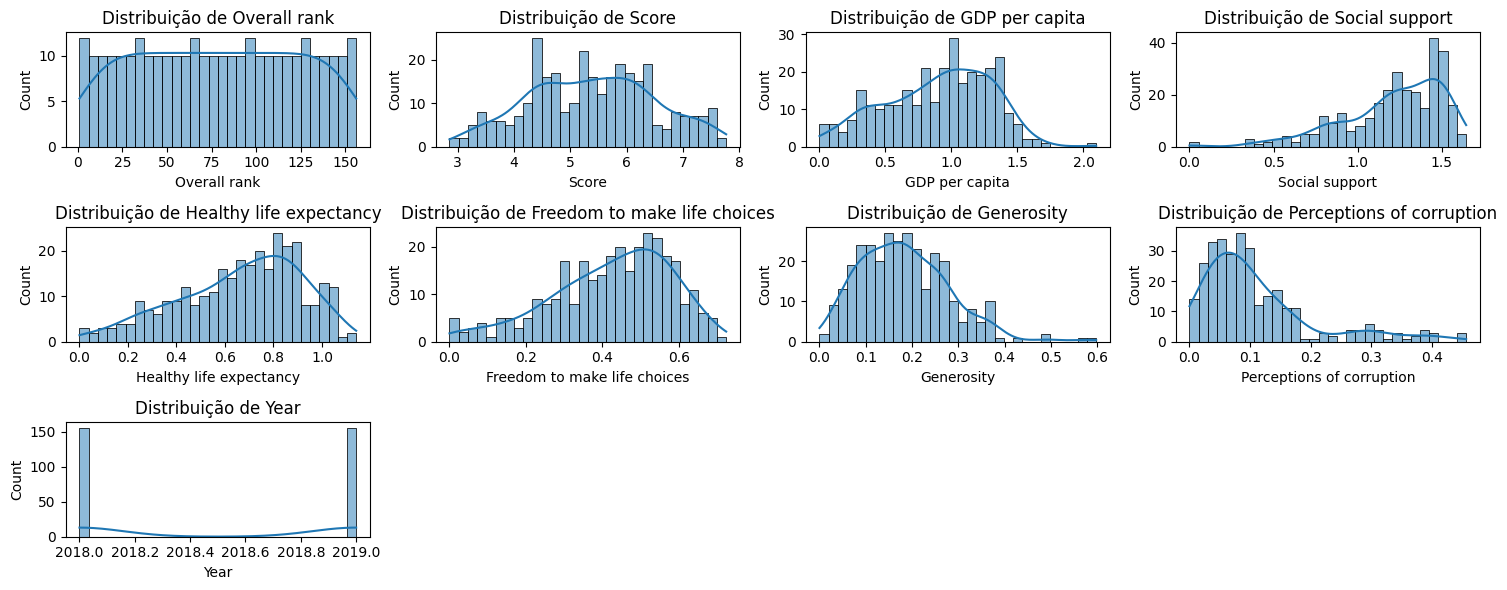

In [28]:
numerical_cols = df_combinado.select_dtypes(include=["number"]).columns

plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, int(len(numerical_cols) / 3) + 1, i + 1)
    sns.histplot(df_combinado[col], bins=30, kde=True)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

### Boxplots para verificar Outliers

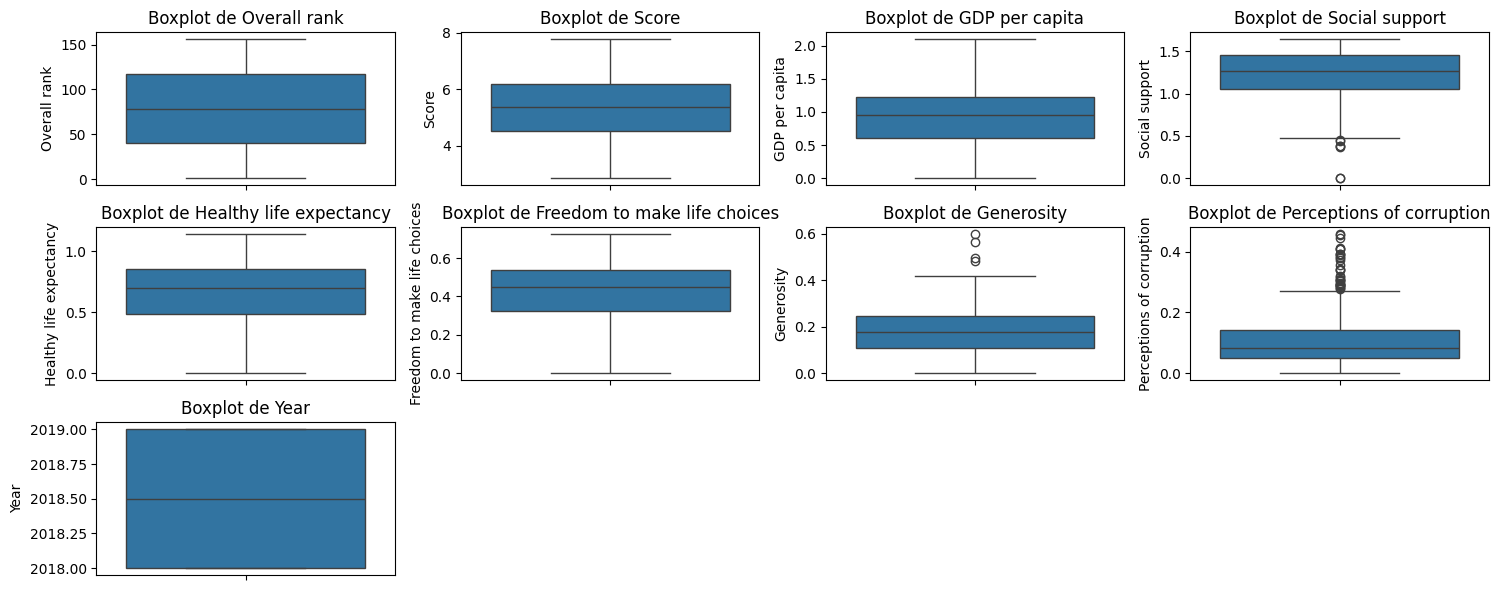

In [27]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, int(len(numerical_cols) / 3) + 1, i + 1)
    sns.boxplot(y=df_combinado[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

### Tratando valores zerados

In [30]:
zero_values = (df_combinado[numerical_cols] == 0).sum()
print("Valores zerados por variável:")
print(zero_values)

Valores zerados por variável:
Overall rank                    0
Score                           0
GDP per capita                  2
Social support                  2
Healthy life expectancy         2
Freedom to make life choices    2
Generosity                      2
Perceptions of corruption       3
Year                            0
dtype: int64


In [33]:
cols_to_replace_zeros = ["Perceptions of corruption", "GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity"]
df_combinado[cols_to_replace_zeros] = df_combinado[cols_to_replace_zeros].replace(0, np.nan)

In [34]:
zero_values = (df_combinado[numerical_cols] == 0).sum()
print("Valores zerados por variável:")
print(zero_values)

Valores zerados por variável:
Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Year                            0
dtype: int64


### Aplicando PCA

In [37]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_combinado[numerical_cols].dropna())

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [38]:
print("Variância explicada pelos componentes principais:", pca.explained_variance_ratio_)

Variância explicada pelos componentes principais: [0.51687858 0.15741859]


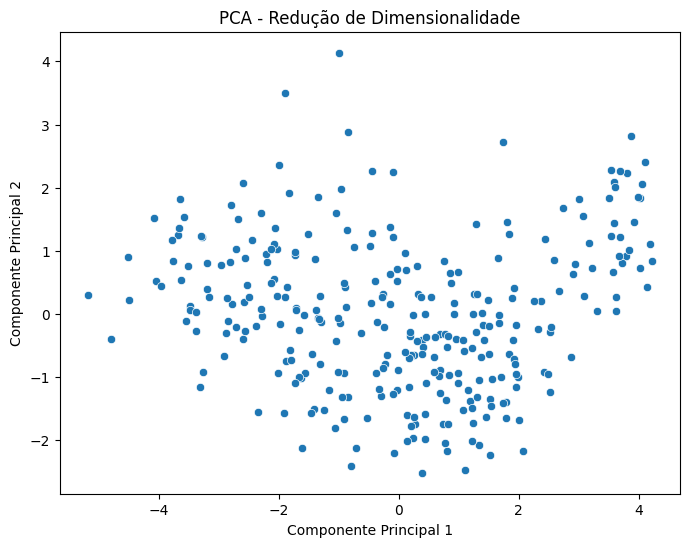

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Redução de Dimensionalidade')
plt.show()

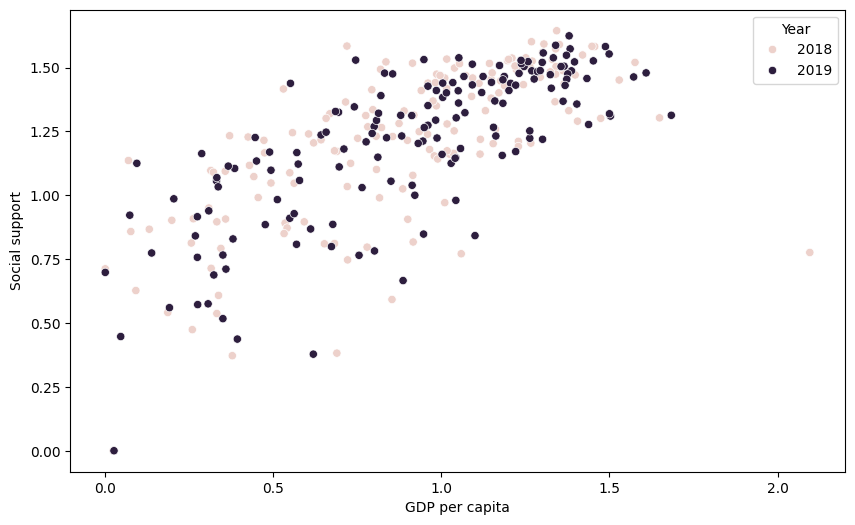

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'GDP per capita',y= 'Social support', data = df_combinado, hue='Year')
plt.show()

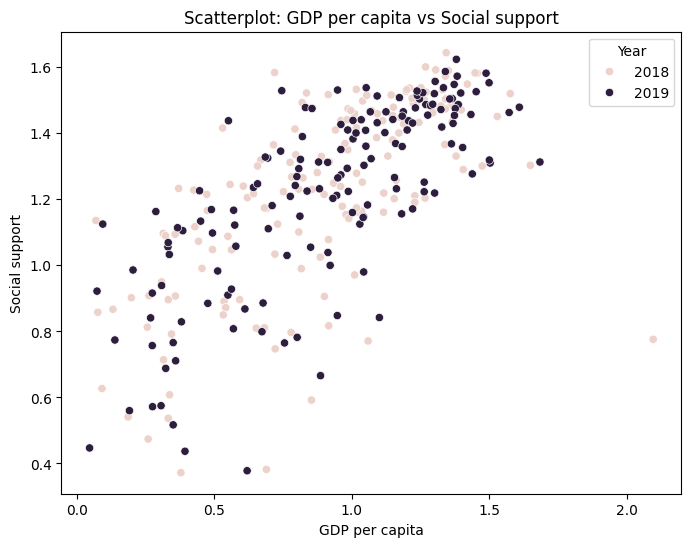

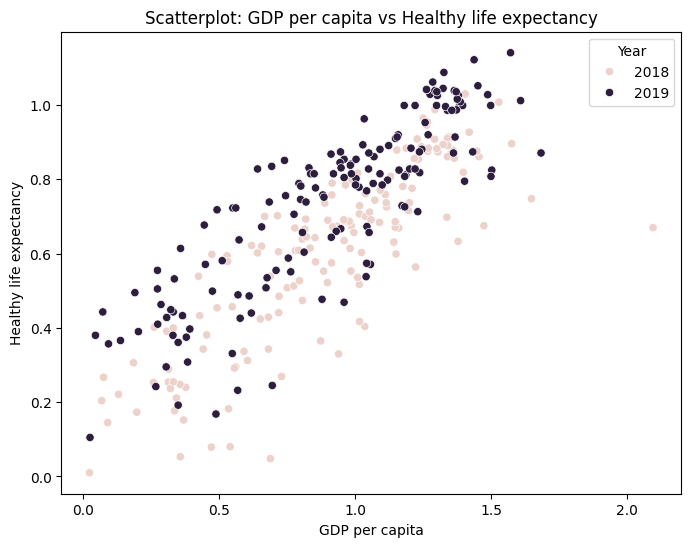

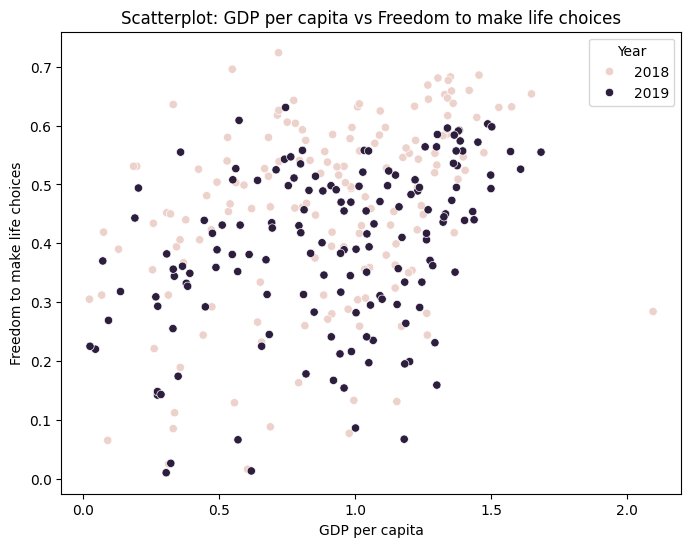

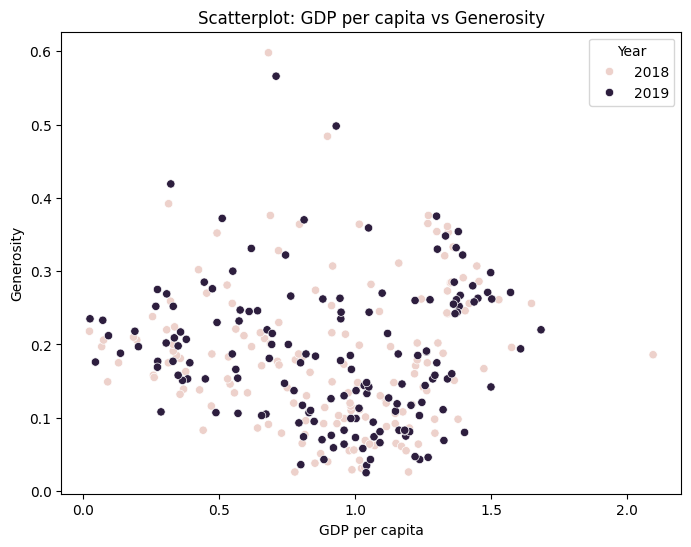

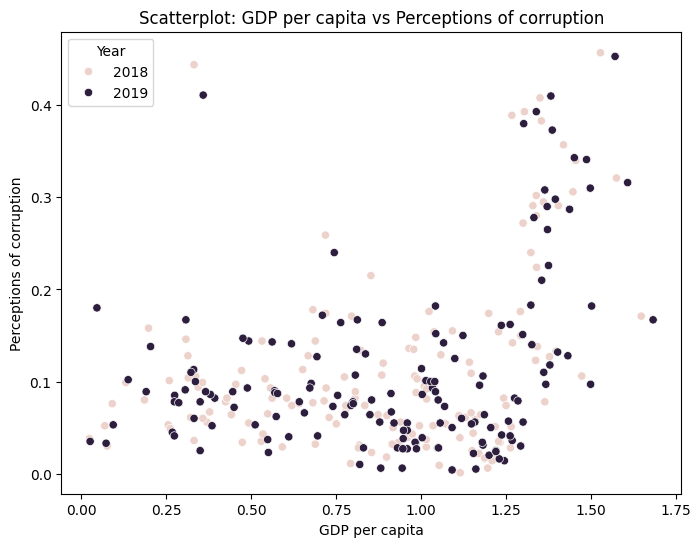

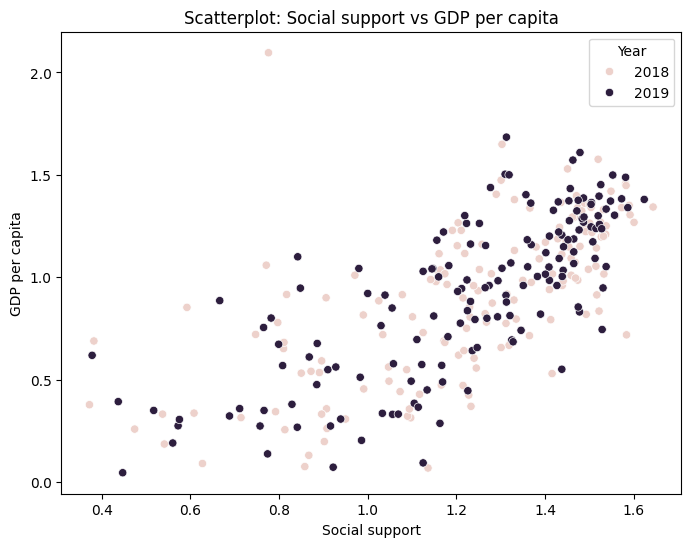

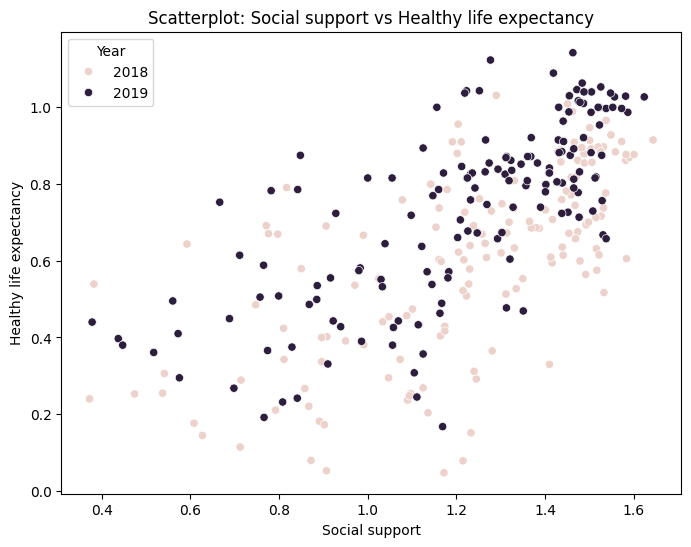

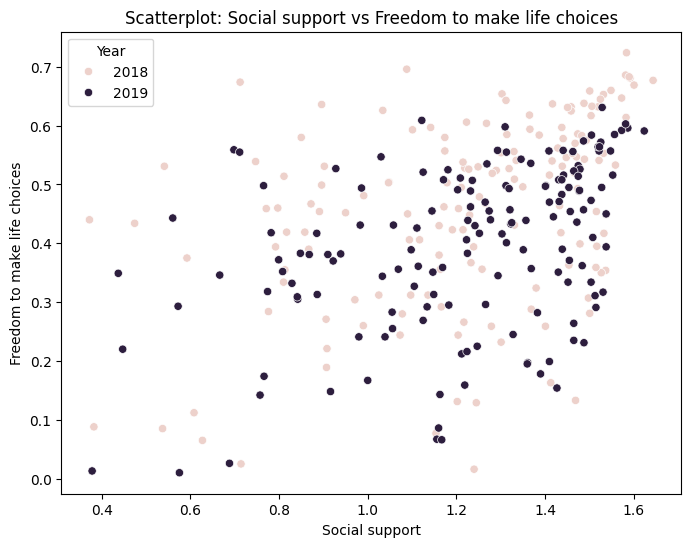

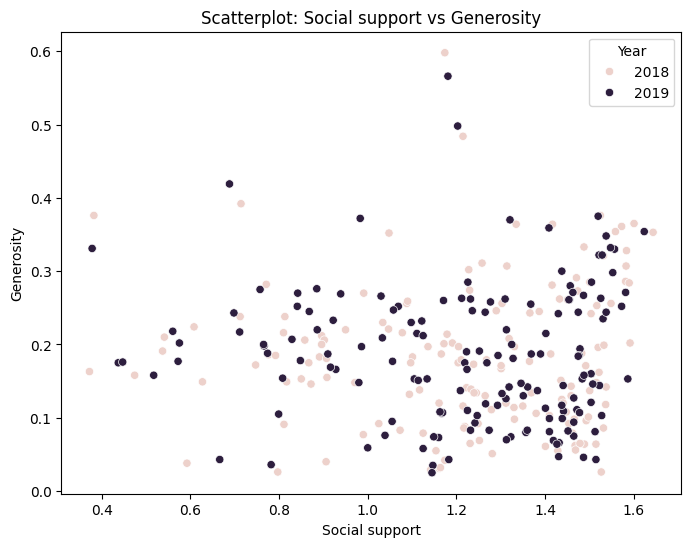

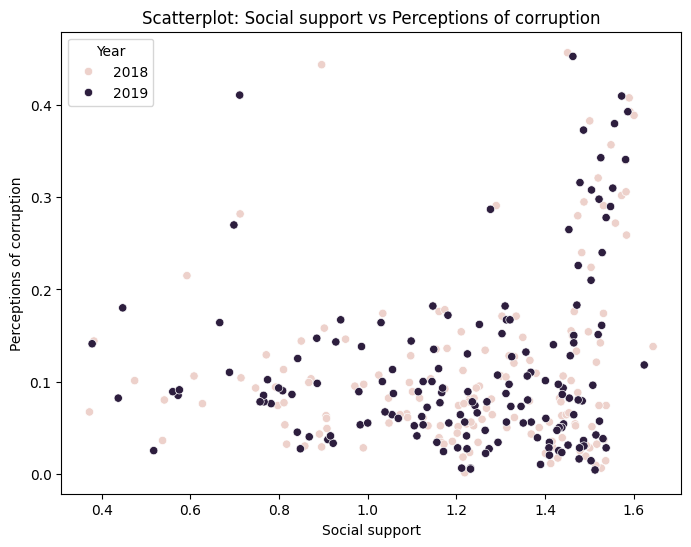

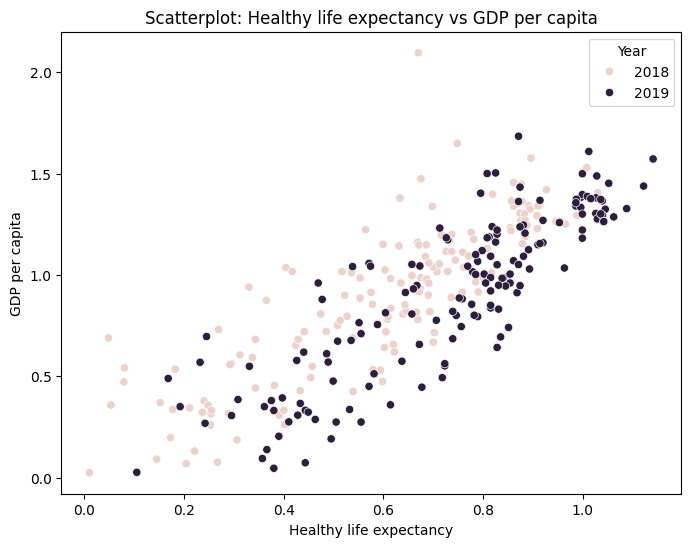

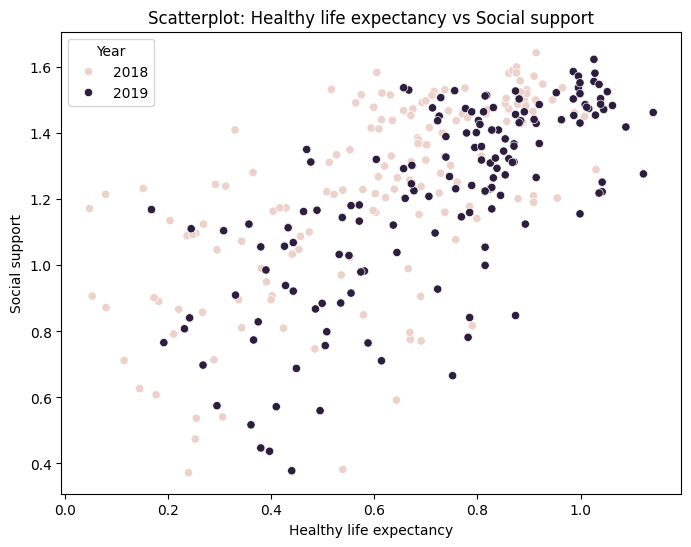

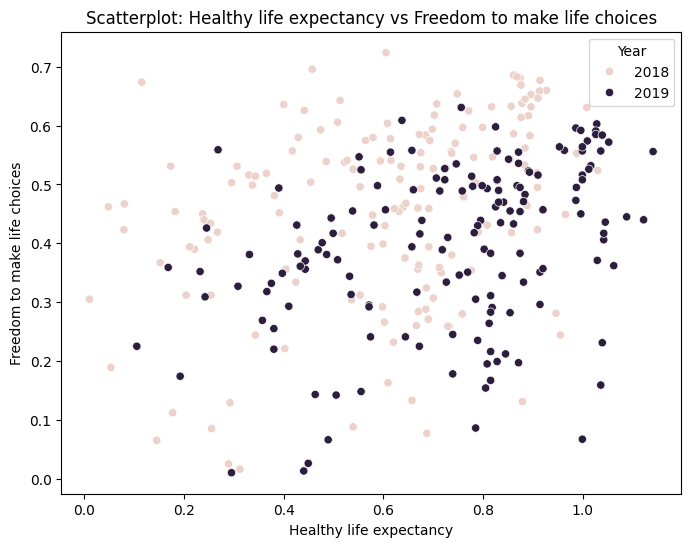

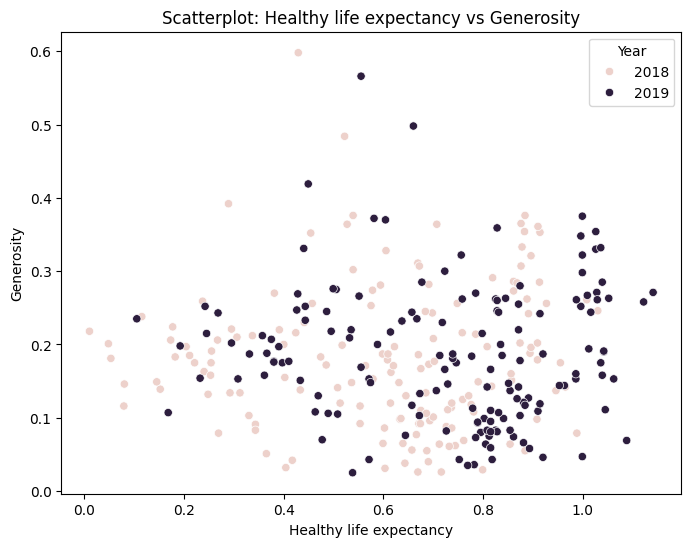

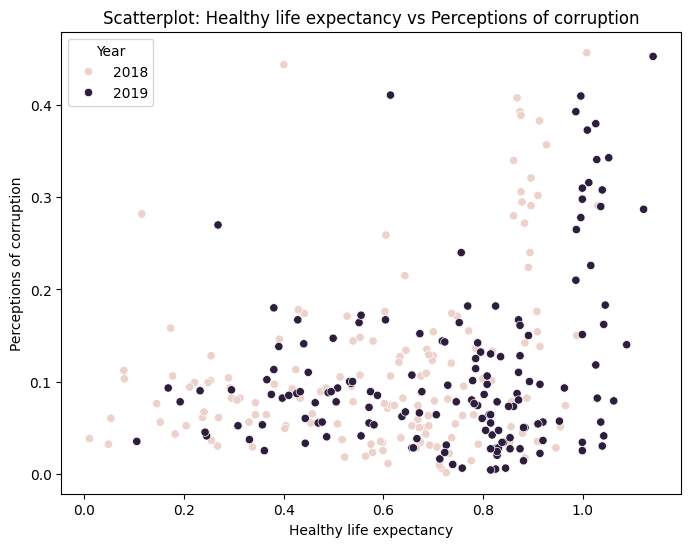

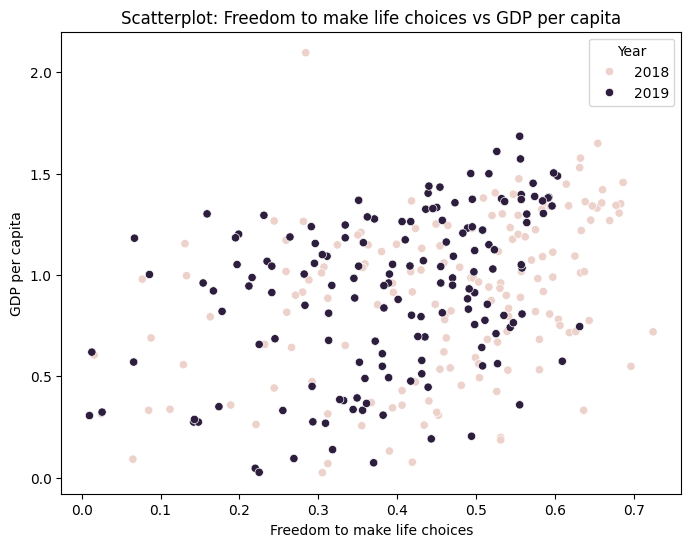

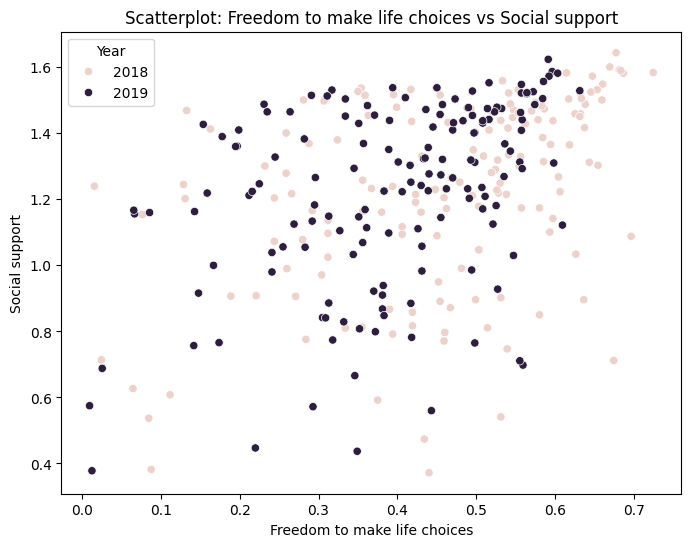

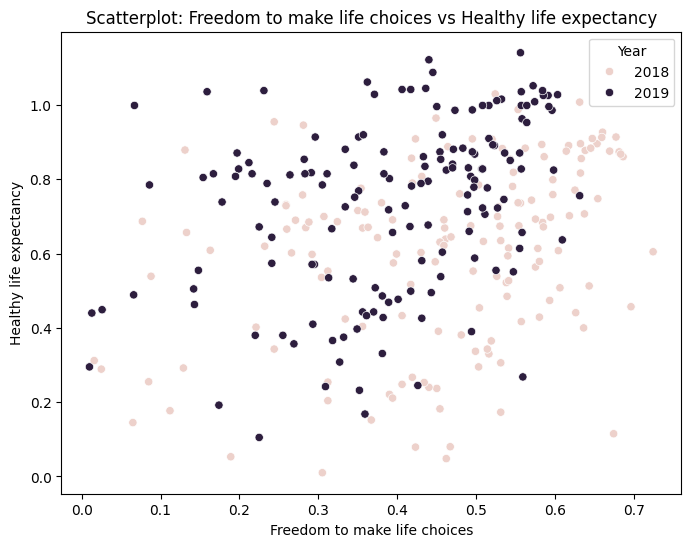

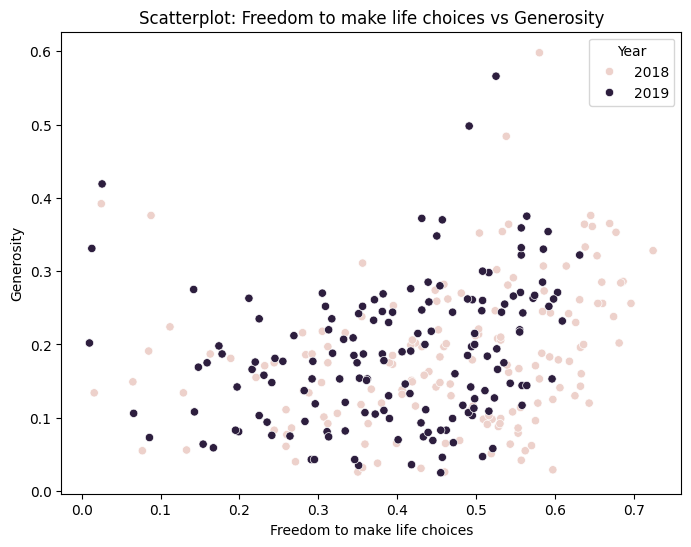

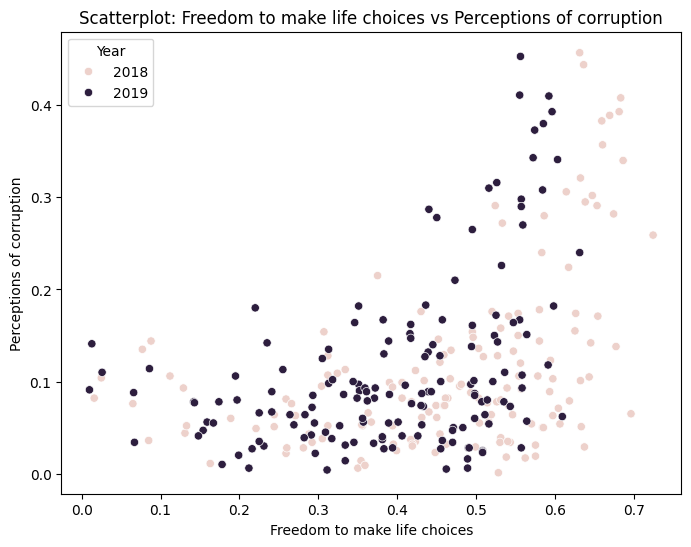

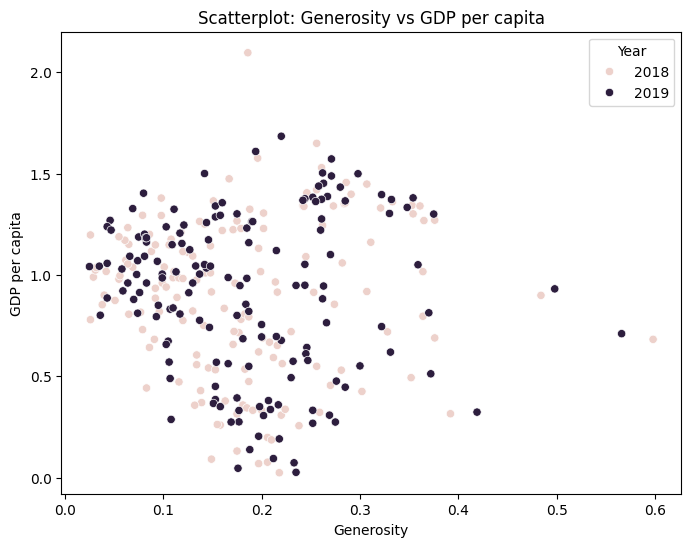

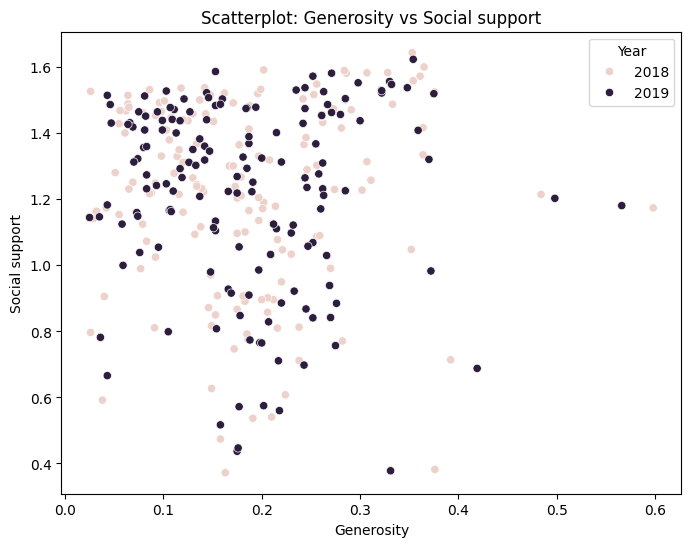

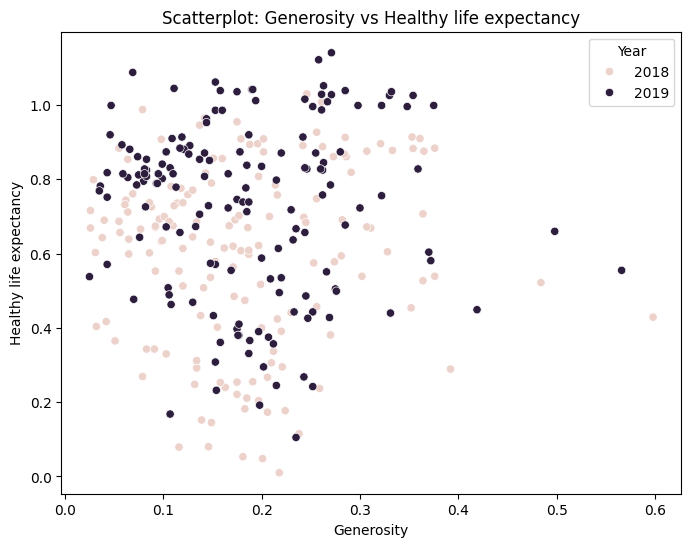

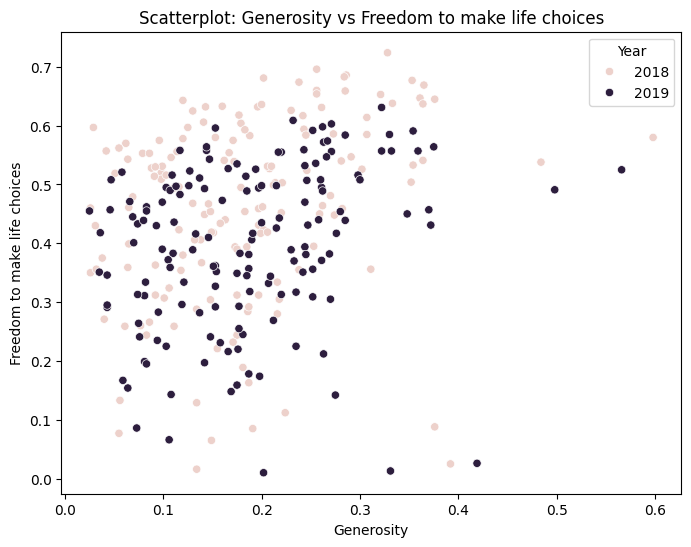

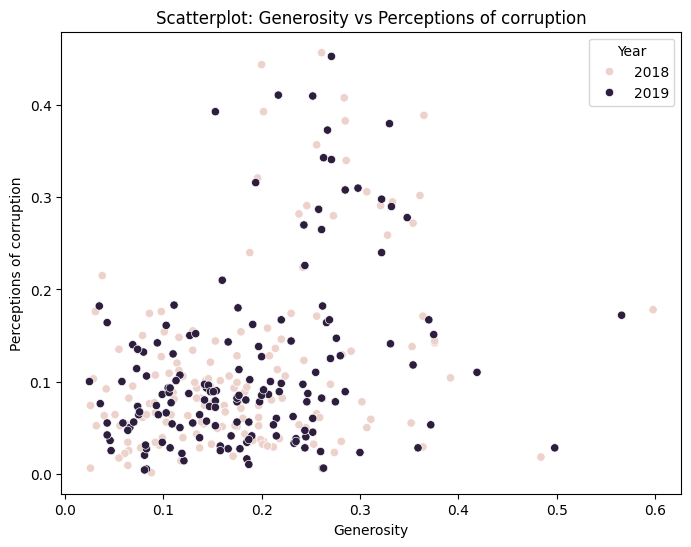

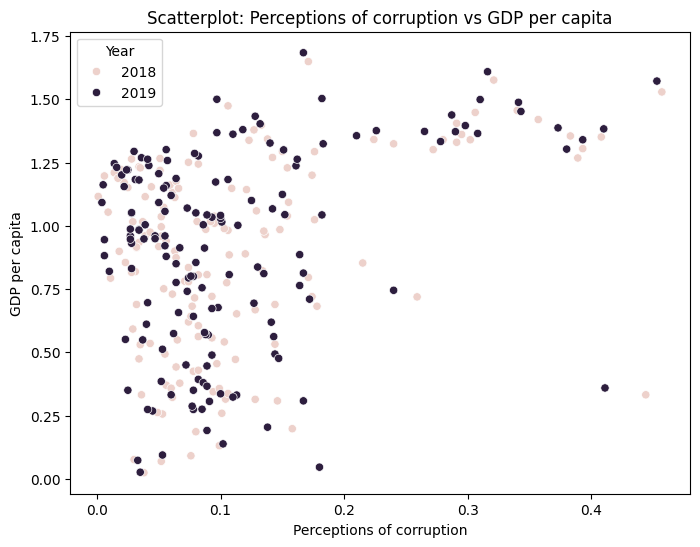

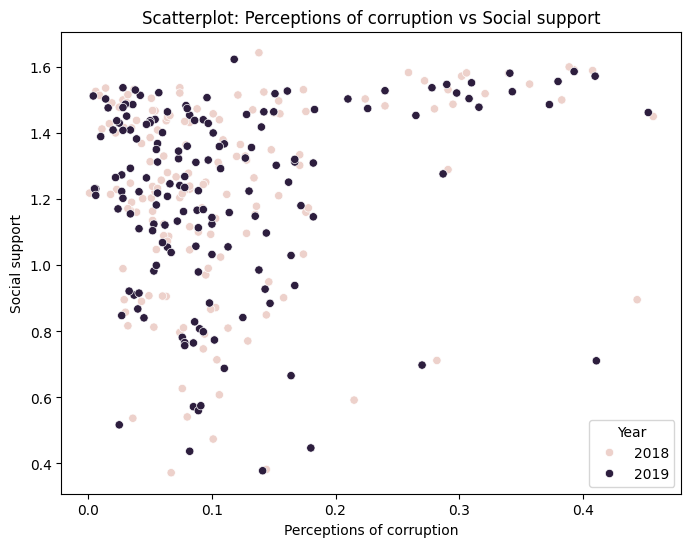

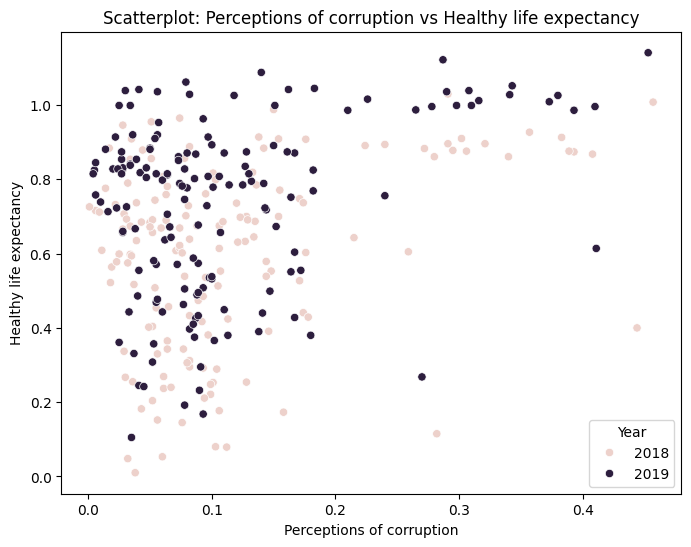

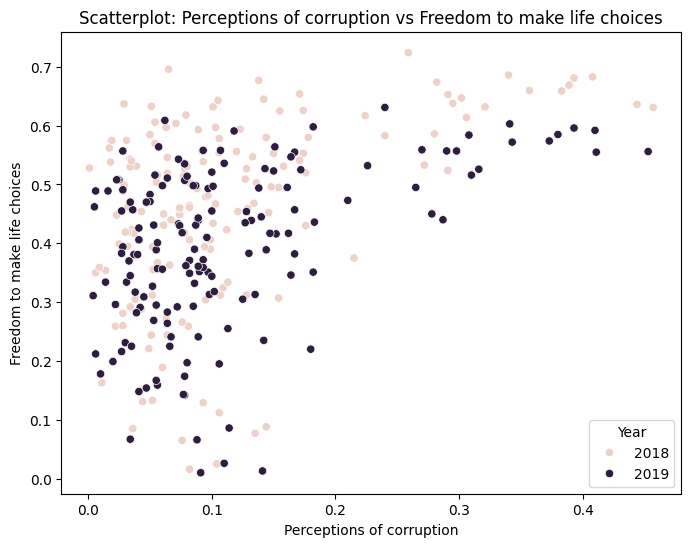

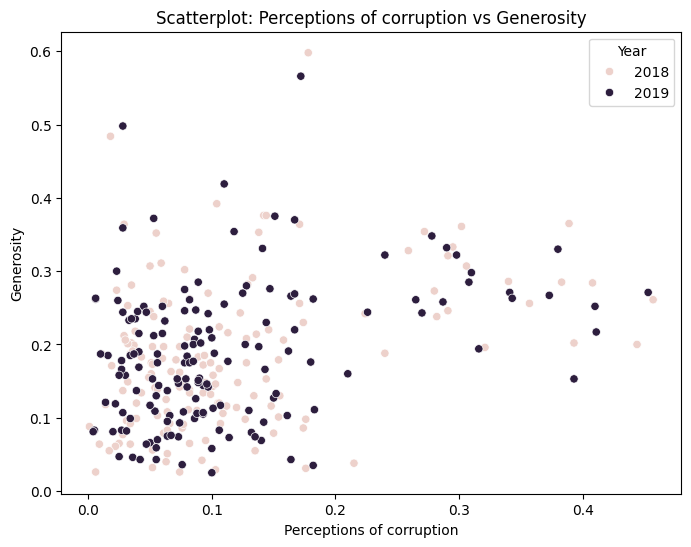

In [40]:
for x in variaveis:
    for y in variaveis:
        if x != y:
            plt.figure(figsize=(8,6))
            sns.scatterplot(x=x, y=y, data = df_combinado,hue = 'Year')
            plt.title(f"Scatterplot: {x} vs {y}")
            plt.xlabel(x)
            plt.ylabel(y)
            plt.show()